<a href="https://colab.research.google.com/github/RoshanJamthe/Kaggle-competition-Titanic-disaster-survival-prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

###The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 

##Data Dictionary
Variable	Definition	Key
survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# <b><u>Data Wrangling

## Dataset Loading

In [229]:
# Importing Data Wrangling libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
import time

import warnings
warnings.simplefilter("ignore")

In [230]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [231]:
# Load the train dataset
df = pd.read_csv("/content/drive/MyDrive/Kaggle : Titanic_survial_classification/train.csv")

In [232]:
# Load the test dataset
test_df = pd.read_csv("/content/drive/MyDrive/Kaggle : Titanic_survial_classification/test.csv")

In [233]:
# Join the train and test dataset together, so we can perform same operations
df = pd.concat([df,test_df])

In [234]:
# View the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



> There are object type features they need to be converted into the numerical format

>There are missing values so those needs to be treated as well.

> The dependent feature 'Survived' is in required data type format



In [235]:
# Drop 'Name','Ticket column. Dropping 'Name' column since its redundant. Dropping 'Ticket' since it has lot many categories
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [236]:
# Check out the 'Fare' feature when 'Fare' < 10
df[df['Fare']<10]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,NaN,S
2,3,1.0,3,female,26.0,0,0,7.9250,NaN,S
4,5,0.0,3,male,35.0,0,0,8.0500,NaN,S
5,6,0.0,3,male,NaN,0,0,8.4583,NaN,Q
12,13,0.0,3,male,20.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
410,1302,NaN,3,female,NaN,0,0,7.7500,NaN,Q
412,1304,NaN,3,female,28.0,0,0,7.7750,NaN,S
413,1305,NaN,3,male,NaN,0,0,8.0500,NaN,S
415,1307,NaN,3,male,38.5,0,0,7.2500,NaN,S


In [237]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1308 non-null   float64
 8   Cabin        295 non-null    object 
 9   Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 112.5+ KB




> Data has some null values.



In [238]:
# Describe the features
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [239]:
# Get unique values from each feature
def unique_values(df):
  for col in df.columns:
    print(f'{col} : {df[col].unique()}')
    print("-*-"*30)

unique_values(df)    

PassengerId : [   1    2    3 ... 1307 1308 1309]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Survived : [ 0.  1. nan]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Pclass : [3 1 2]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Sex : ['male' 'female']
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Age : [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.4

* Some of the independent features are continuous, discrete, some are nomial, some are ordinal in nature.

* There is no mismatched data 

## Feature engineering 

In [240]:
# View the dataset
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1.0,1,female,38.0,1,0,71.2833,C85,C
2,3,1.0,3,female,26.0,0,0,7.9250,NaN,S
3,4,1.0,1,female,35.0,1,0,53.1000,C123,S
4,5,0.0,3,male,35.0,0,0,8.0500,NaN,S


### SEX

In [241]:
# Use a dictionary and replace function
encoders_nums = {"Sex": {"female":0,"male":1}}

df = df.replace(encoders_nums)  

In [242]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.0,3,1,22.0,1,0,7.2500,NaN,S
1,2,1.0,1,0,38.0,1,0,71.2833,C85,C
2,3,1.0,3,0,26.0,0,0,7.9250,NaN,S
3,4,1.0,1,0,35.0,1,0,53.1000,C123,S
4,5,0.0,3,1,35.0,0,0,8.0500,NaN,S


###Cabin

In [243]:
# Filling nan values, so they won't create problems
df['Cabin'].fillna(0,inplace=True)

In [244]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.0,3,1,22.0,1,0,7.2500,0,S
1,2,1.0,1,0,38.0,1,0,71.2833,C85,C
2,3,1.0,3,0,26.0,0,0,7.9250,0,S
3,4,1.0,1,0,35.0,1,0,53.1000,C123,S
4,5,0.0,3,1,35.0,0,0,8.0500,0,S


In [245]:
# get cabin number 
def cabin_number(row):
  if row !=0:
    row = row.split()
    last = row[-1]
    ans = []
    for i in range(len(last)):
      if last[i] not in ['A','B','C','D','E','F','G','T']:
        ans.append(last[i])

    ped = ''.join(ans)    
    if len(ped)==0:
      return 0 
    else:
      return ped  
  else:
    return 0

In [246]:
# Get cabin_num 
df['Cabin_num'] = df['Cabin'].apply(cabin_number)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_num
0,1,0.0,3,1,22.0,1,0,7.2500,0,S,0
1,2,1.0,1,0,38.0,1,0,71.2833,C85,C,85
2,3,1.0,3,0,26.0,0,0,7.9250,0,S,0
3,4,1.0,1,0,35.0,1,0,53.1000,C123,S,123
4,5,0.0,3,1,35.0,0,0,8.0500,0,S,0


In [247]:
# get cabin class
def cabin_class(row):
  if row !=0:
    row = row.split()
    last = row[-1]

    return last[0]
  else:
    return 'np'

In [248]:
# Create feature cabin class
df['Cabin_class'] = df['Cabin'].apply(cabin_class)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_num,Cabin_class
0,1,0.0,3,1,22.0,1,0,7.2500,0,S,0,np
1,2,1.0,1,0,38.0,1,0,71.2833,C85,C,85,C
2,3,1.0,3,0,26.0,0,0,7.9250,0,S,0,np
3,4,1.0,1,0,35.0,1,0,53.1000,C123,S,123,C
4,5,0.0,3,1,35.0,0,0,8.0500,0,S,0,np


In [249]:
# Check out unique features from cabin_class
df['Cabin_class'].unique()

array(['np', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [250]:
# Drop 'id' column
df.drop(['Cabin'],axis=1,inplace=True)

In [251]:
# View the change
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1308 non-null   float64
 8   Embarked     1307 non-null   object 
 9   Cabin_num    1309 non-null   object 
 10  Cabin_class  1309 non-null   object 
dtypes: float64(3), int64(5), object(3)
memory usage: 122.7+ KB


###Imputing values

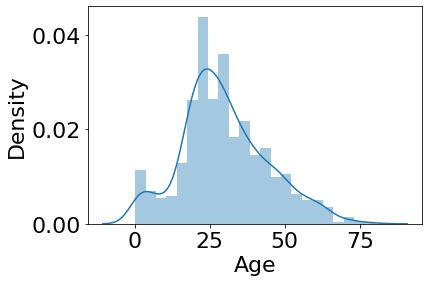

In [252]:
# Check 'Age' distribution
sns.distplot(df['Age'])

In [253]:
df['Age'].mean(),df['Age'].median()

(29.881137667304014, 28.0)

In [254]:
# Fill na values in 'Age' feature with 30 which is close to median value
df['Age'].fillna(30,inplace=True)

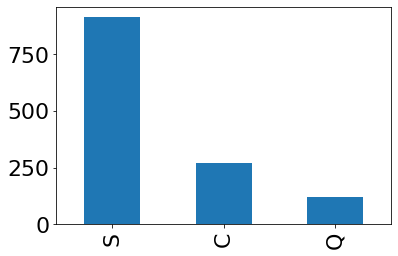

In [255]:
# Get 'Embarked' feature distribution
count = df['Embarked'].value_counts()
count.plot.bar()

In [256]:
# Filling na values in 'Embarked' by 'S' which is mode()
df['Embarked'].fillna('S',inplace=True)

In [257]:
# Change cabin_num to integer type
df['Cabin_num'] = df['Cabin_num'].astype('int32')

In [258]:
# Check the Fare when Fare is null
df[df['Fare'].isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_num,Cabin_class
152,1044,NaN,3,1,60.5,0,0,NaN,S,0,np


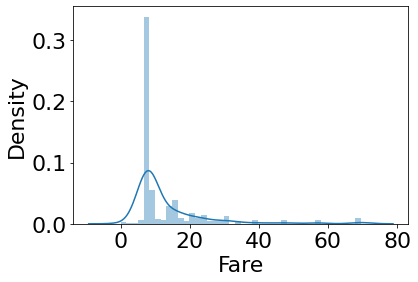

In [259]:
# Plot Fare distribution
sns.distplot(df[df['Pclass']==3]['Fare'])

In [260]:
# Check out mean and median values
df[df['Pclass']==3]['Fare'].median(), df[df['Pclass']==3]['Fare'].mean()

(8.05, 13.302888700564969)

In [261]:
# Impute the median() value in 'Fare', inplace of nan value
df['Fare'].fillna(8.05,inplace=True)

In [262]:
# Check the info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1309 non-null   float64
 8   Embarked     1309 non-null   object 
 9   Cabin_num    1309 non-null   int32  
 10  Cabin_class  1309 non-null   object 
dtypes: float64(3), int32(1), int64(5), object(2)
memory usage: 117.6+ KB


### Dummy variables

In [263]:
# Get unique values of 'Embarked' feature
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [264]:
# Get unique values of 'Cabin_class' feature
df['Cabin_class'].unique()

array(['np', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [265]:
# Create dummies
df = pd.get_dummies(df, columns=['Embarked', 'Cabin_class'])

In [266]:
# Check out the change
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_num,Embarked_C,...,Embarked_S,Cabin_class_A,Cabin_class_B,Cabin_class_C,Cabin_class_D,Cabin_class_E,Cabin_class_F,Cabin_class_G,Cabin_class_T,Cabin_class_np
0,1,0.0,3,1,22.0,1,0,7.2500,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2,1.0,1,0,38.0,1,0,71.2833,85,1,...,0,0,0,1,0,0,0,0,0,0
2,3,1.0,3,0,26.0,0,0,7.9250,0,0,...,1,0,0,0,0,0,0,0,0,1
3,4,1.0,1,0,35.0,1,0,53.1000,123,0,...,1,0,0,1,0,0,0,0,0,0
4,5,0.0,3,1,35.0,0,0,8.0500,0,0,...,1,0,0,0,0,0,0,0,0,1


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1309 non-null   int64  
 1   Survived        891 non-null    float64
 2   Pclass          1309 non-null   int64  
 3   Sex             1309 non-null   int64  
 4   Age             1309 non-null   float64
 5   SibSp           1309 non-null   int64  
 6   Parch           1309 non-null   int64  
 7   Fare            1309 non-null   float64
 8   Cabin_num       1309 non-null   int32  
 9   Embarked_C      1309 non-null   uint8  
 10  Embarked_Q      1309 non-null   uint8  
 11  Embarked_S      1309 non-null   uint8  
 12  Cabin_class_A   1309 non-null   uint8  
 13  Cabin_class_B   1309 non-null   uint8  
 14  Cabin_class_C   1309 non-null   uint8  
 15  Cabin_class_D   1309 non-null   uint8  
 16  Cabin_class_E   1309 non-null   uint8  
 17  Cabin_class_F   1309 non-null   ui

Great! Now we have all the data in numerical format

Next steps demands data to be in numerical format

Converting the continuous features to categorical type

## Correlation heatmap

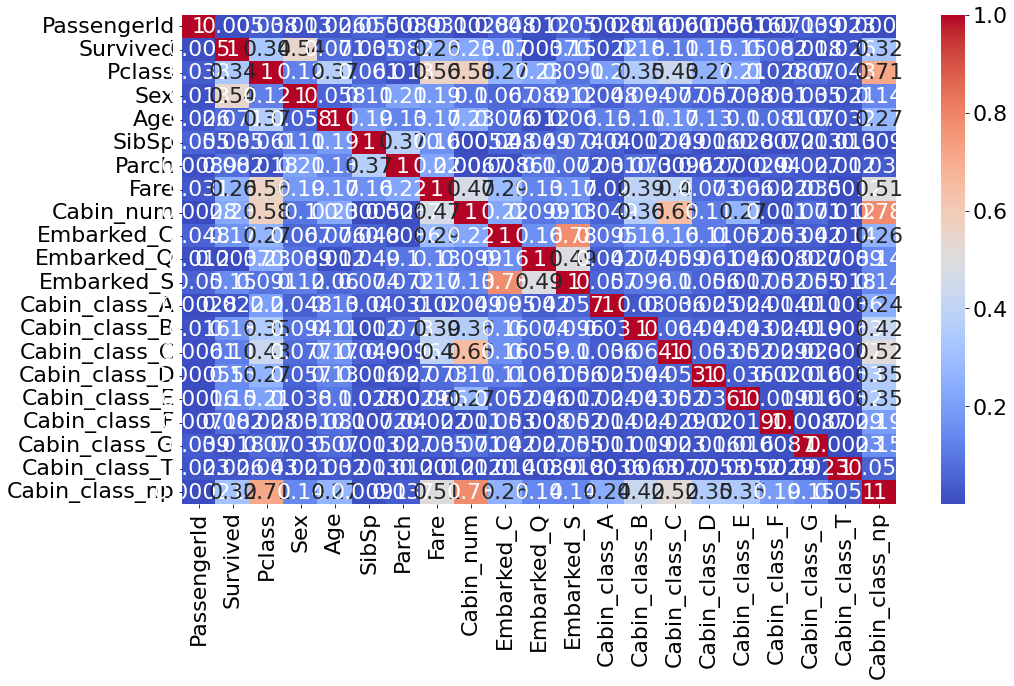

In [268]:
# Get the heatmap using seaborn.heatmap 
plt.figure(figsize=(16,9))
sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')

# <b><u>Build ML models

## Pre-processing

### Separating train and test dataset

In [269]:
# Remember how our dataframe looked like, no? Lets view it again.
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_num,Embarked_C,...,Embarked_S,Cabin_class_A,Cabin_class_B,Cabin_class_C,Cabin_class_D,Cabin_class_E,Cabin_class_F,Cabin_class_G,Cabin_class_T,Cabin_class_np
0,1,0.0,3,1,22.0,1,0,7.2500,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2,1.0,1,0,38.0,1,0,71.2833,85,1,...,0,0,0,1,0,0,0,0,0,0
2,3,1.0,3,0,26.0,0,0,7.9250,0,0,...,1,0,0,0,0,0,0,0,0,1
3,4,1.0,1,0,35.0,1,0,53.1000,123,0,...,1,0,0,1,0,0,0,0,0,0
4,5,0.0,3,1,35.0,0,0,8.0500,0,0,...,1,0,0,0,0,0,0,0,0,1


In [270]:
# Import the normalizer 'MinMaxScaler'
from sklearn.preprocessing import MinMaxScaler

In [271]:
scalar = MinMaxScaler()

In [272]:
# Getting normalized X and y
X = pd.DataFrame(scalar.fit_transform(df.drop('Survived',axis=1)),columns=df.drop('Survived',axis=1).columns)

y = df['Survived']

In [273]:
# View the independent feature dataset
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_num,Embarked_C,Embarked_Q,Embarked_S,Cabin_class_A,Cabin_class_B,Cabin_class_C,Cabin_class_D,Cabin_class_E,Cabin_class_F,Cabin_class_G,Cabin_class_T,Cabin_class_np
0,0.000000,1.0,1.0,0.273456,0.125,0.0,0.014151,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000765,0.0,0.0,0.473882,0.125,0.0,0.139136,0.574324,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001529,1.0,0.0,0.323563,0.000,0.0,0.015469,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.002294,0.0,0.0,0.436302,0.125,0.0,0.103644,0.831081,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.003058,1.0,1.0,0.436302,0.000,0.0,0.015713,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [274]:
# Prepare y_test
ans_df = pd.read_csv("/content/drive/MyDrive/Kaggle : Titanic_survial_classification/gender_submission.csv")

In [275]:
ans_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [276]:
y_test = ans_df['Survived']

In [277]:
X.iloc[:891,:].tail()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_num,Embarked_C,Embarked_Q,Embarked_S,Cabin_class_A,Cabin_class_B,Cabin_class_C,Cabin_class_D,Cabin_class_E,Cabin_class_F,Cabin_class_G,Cabin_class_T,Cabin_class_np
886,0.677370,0.5,1.0,0.336089,0.000,0.000000,0.025374,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,0.678135,0.0,0.0,0.235876,0.000,0.000000,0.058556,0.283784,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0.678899,1.0,0.0,0.373669,0.125,0.222222,0.045771,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,0.679664,0.0,1.0,0.323563,0.000,0.000000,0.058556,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
890,0.680428,1.0,1.0,0.398722,0.000,0.000000,0.015127,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [278]:
y.iloc[:891].tail()

886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, dtype: float64

In [279]:
# Train-test split
X_train = X.iloc[:891,:]
X_test = X.iloc[891:,:]
y_train = y.iloc[:891]

# Check the shape of train dataset
print(X_train.shape,y_train.shape)

# Check the shape of test dataset
print(X_test.shape, y_test.shape)

(891, 20) (891,)
(418, 20) (418,)


In [280]:
# Check the value count in y_train dataset
y_train.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [281]:
# Check the value count in y_test dataset
y_test.value_counts()

0    266
1    152
Name: Survived, dtype: int64

### Importing all the libraries needed

In [282]:
# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Performance metrics for classification problem
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

In [283]:
# Since we need to select the best model out of four, using BayesSeachCV
!pip install scikit-optimize

In [284]:
# Complex model will be interpreted with SHAP. Install shap 
!pip install shap

In [285]:
# To get best values of hyperparameters use BayesSearch crossvalidation
from skopt import BayesSearchCV
# Import time to record time taken for time consuming steps
import time
# Import shap to enhance the explainability of the black box models
import shap

### Creating functions to reduce number of lines of code

#### individual_model_performance(model_name,X_train,X_test,y_train,y_test)

In [286]:
# Get the accuracy score for the individual model
def individual_model_performance(model_name,X_train,X_test,y_train,y_test):

  # Get the predicted classes
  train_class_preds = model_name.predict(X_train)
  test_class_preds = model_name.predict(X_test)

  # Will need these libraries
  from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

  # Get train scores
  train_f_score = f1_score(y_train,train_class_preds)
  train_accuracy = accuracy_score(y_train,train_class_preds)
  train_recall = recall_score(y_train,train_class_preds)
  train_precision = precision_score(y_train,train_class_preds)
  train_log_loss = log_loss(y_train,train_class_preds)
  train_roc_auc = roc_auc_score(y_train,train_class_preds)

  # Get test scores
  test_f_score = f1_score(y_test,test_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)
  test_recall = recall_score(y_test,test_class_preds)
  test_precision = precision_score(y_test,test_class_preds)
  test_log_loss = log_loss(y_test,test_class_preds)
  test_roc_auc = roc_auc_score(y_test,test_class_preds)

  # Prepare a metric dataframe
  metric = ('f_score', 'Accuracy', 'Recall', 'Precision', 'log_loss','roc_auc')
  train_metric = [train_f_score, train_accuracy, train_recall, train_precision, train_log_loss, train_roc_auc]
  test_metric = [test_f_score, test_accuracy, test_recall, test_precision, test_log_loss, test_roc_auc]

  metrics = pd.DataFrame(list(zip(metric,train_metric,test_metric)), columns = ['Metric','Performance on Train Data', 'Performance on Test Data'])
  return metrics

#### get_confusion_matrix(model_name, X, y, label)

In [287]:
# Get the confusion matrix and label it
def get_confusion_matrix(model_name, X, y,label):
  test_class_preds = model_name.predict(X)
  plt.figure(figsize=(9,5))
  labels = ['NO', 'YES']
  cm = confusion_matrix(y, test_class_preds)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax, fmt='d',annot_kws={"size":15}); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels',fontsize=15)
  ax.set_ylabel('True labels',fontsize=15)
  ax.set_title(f'Confusion Matrix for {label} dataset',fontsize=20)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

## <b><u>Logistic regression model 

### WIthout regularization

In [288]:
# Fitting the LogisticRegression on train data
clf = LogisticRegression(fit_intercept=True)
clf.fit(X_train, y_train)

LogisticRegression()

In [289]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [290]:
# Get score for train and test data
clf.score(X_train, y_train) , clf.score(X_test, y_test)

(0.8080808080808081, 0.9425837320574163)

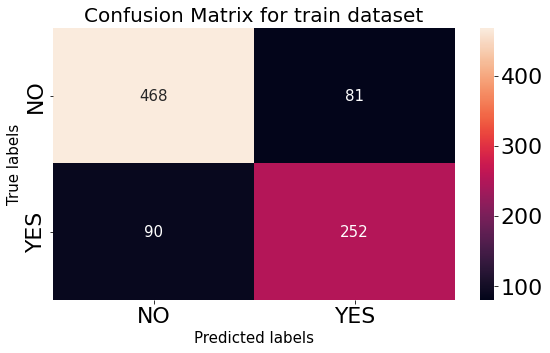

In [291]:
# get confusion matrix for train data
get_confusion_matrix(clf,X_train,y_train,'train')

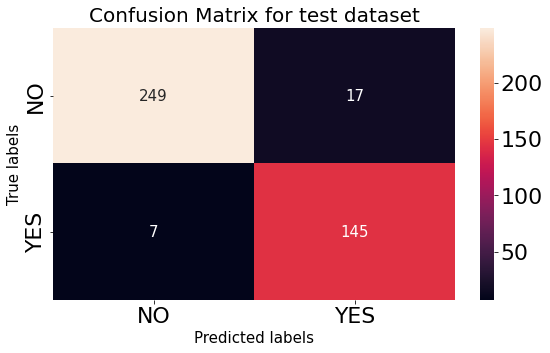

In [292]:
# get confusion matrix for test data
get_confusion_matrix(clf,X_test,y_test,'test')

In [293]:
clf.intercept_

array([3.4961493])

In [294]:
# View the coefficient values
def feature_coefficients(model_name,X):
  labels = df.drop('Survived',axis=1).columns
  coef = pd.DataFrame(list(zip(labels,model_name.coef_[0])),columns=['Features','Coef'])
  coef['Absolute coef'] = abs(coef['Coef'])
  coef.sort_values('Absolute coef',ascending=False,inplace=True)
  return coef.reset_index(drop=True)

In [295]:
feature_coefficients(clf,X_train)

,Features,Coef,Absolute coef
0,Sex,-2.564549,2.564549
1,Age,-2.205060,2.205060
2,Pclass,-1.553873,1.553873
3,SibSp,-1.459444,1.459444
4,Cabin_class_E,0.777424,0.777424
5,Cabin_class_F,0.776257,0.776257
6,Cabin_class_G,-0.695050,0.695050
7,Cabin_class_np,-0.551971,0.551971
8,Parch,-0.506190,0.506190
9,Cabin_class_C,-0.442644,0.442644


In [296]:
# Get model performance using function I built, model_performance
individual_model_performance(clf,X_train,X_test,y_train,y_test)

,Metric,Performance on Train Data,Performance on Test Data
0,f_score,0.746667,0.923567
1,Accuracy,0.808081,0.942584
2,Recall,0.736842,0.953947
3,Precision,0.756757,0.895062
4,log_loss,6.628727,1.983120
5,roc_auc,0.794651,0.945019


It's a poor model 

### With lasso regularization

In [297]:
# Apply BayesSearch crossvalidation
start = time. time()

lasso = LogisticRegression(penalty='l1',solver='liblinear', fit_intercept=True, max_iter=10000)

lasso_bayes = BayesSearchCV(estimator=lasso, search_spaces={'C':(0.0001,10)}, n_iter=30, cv = 3, verbose=2, scoring='recall')

# Fit the data
lasso_bayes.fit(X_train,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ...............................C=2.4806895776104594; total time=   0.0s
[CV] END ...............................C=2.4806895776104594; total time=   0.0s
[CV] END ...............................C=2.4806895776104594; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ..............................C=0.46012371837807203; total time=   0.0s
[CV] END ..............................C=0.46012371837807203; total time=   0.0s
[CV] END ..............................C=0.46012371837807203; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ................................C=8.038634913057129; total time=   0.0s
[CV] END ................................C=8.038634913057129; total time=   0.0s
[CV] END ................................C=8.038634913057129; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ..........................

In [298]:
# Get best estimator
lasso_bayes.best_estimator_

LogisticRegression(C=5.872495400916024, max_iter=10000, penalty='l1',
                   solver='liblinear')

In [299]:
# Create a optimal model
lasso_bayes_optimal = lasso_bayes.best_estimator_

#### Performance check

In [300]:
# Get the scores on both train and test data
lasso_bayes_optimal.score(X_train,y_train), lasso_bayes_optimal.score(X_test,y_test)

(0.8125701459034792, 0.9258373205741627)

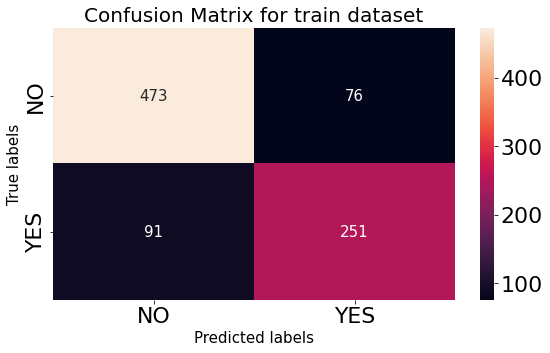

In [301]:
# Get confusion matrix for train data
get_confusion_matrix(lasso_bayes_optimal,X_train,y_train,'train')

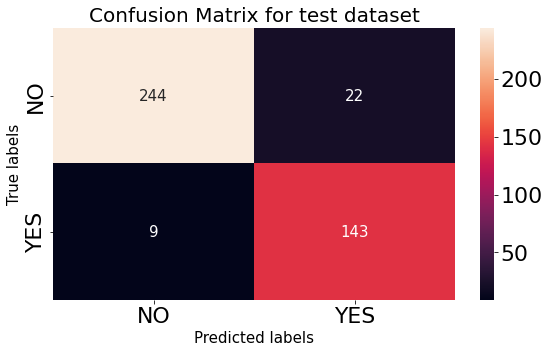

In [302]:
# Get confusion matrix for test data
get_confusion_matrix(lasso_bayes_optimal,X_test,y_test,'test')

In [303]:
# Get feature coefficients
feature_coefficients(lasso_bayes_optimal,X_train)

,Features,Coef,Absolute coef
0,Age,-3.171322,3.171322
1,Sex,-2.732981,2.732981
2,SibSp,-2.542225,2.542225
3,Pclass,-1.729842,1.729842
4,Cabin_class_F,1.654555,1.654555
5,Cabin_class_E,1.478455,1.478455
6,Cabin_class_D,1.001670,1.001670
7,Fare,0.945524,0.945524
8,Cabin_class_G,-0.779840,0.779840
9,Parch,-0.761920,0.761920


In [304]:
# Get model performance using function I built, model_performance
individual_model_performance(lasso_bayes_optimal,X_train,X_test,y_train,y_test)

,Metric,Performance on Train Data,Performance on Test Data
0,f_score,0.750374,0.902208
1,Accuracy,0.812570,0.925837
2,Recall,0.733918,0.940789
3,Precision,0.767584,0.866667
4,log_loss,6.473666,2.561530
5,roc_auc,0.797742,0.929041


## <b><u>Random Forest Classifier model

### Training a Random Forest Classifier

In [305]:
# Get a random randomforest model and check the score
rf_model = RandomForestClassifier(max_depth=50, min_samples_leaf=10,min_samples_split=10,n_jobs=2)
rf_model.fit(X_train,y_train)
clf.score(X_train, y_train) , clf.score(X_test, y_test)

(0.8080808080808081, 0.9425837320574163)

In [306]:
# Optimize the hyperparameters using BayesSearch cross-validation
start = time. time()

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()
# Grid search
rf_bayes= BayesSearchCV(estimator=rf_model,
                       search_spaces = {'max_depth': (5,20),
                                    'min_samples_leaf': (5,150),
                                    'min_samples_split': (5,150)}, n_iter=20,
                       cv = 3, verbose=2, scoring='recall')
# Fit the data
rf_bayes.fit(X_train,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=9, min_samples_leaf=118, min_samples_split=21; total time=   0.3s
[CV] END max_depth=9, min_samples_leaf=118, min_samples_split=21; total time=   0.2s
[CV] END max_depth=9, min_samples_leaf=118, min_samples_split=21; total time=   0.3s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=8, min_samples_leaf=28, min_samples_split=102; total time=   0.2s
[CV] END max_depth=8, min_samples_leaf=28, min_samples_split=102; total time=   0.2s
[CV] END max_depth=8, min_samples_leaf=28, min_samples_split=102; total time=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=16, min_samples_leaf=135, min_samples_split=148; total time=   0.2s
[CV] END max_depth=16, min_samples_leaf=135, min_samples_split=148; total time=   0.2s
[CV] END max_depth=16, min_samples_leaf=135, min_samples_split=148; total time=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 

In [307]:
# Get the best estimators
rf_bayes.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=5)

In [308]:
# Create the optimal random forest model
rf_bayes_optimal = rf_bayes.best_estimator_

### Performance check

In [309]:
# Get the score on train and test data
rf_bayes_optimal.score(X_train,y_train),rf_bayes_optimal.score(X_test,y_test)

(0.8754208754208754, 0.8397129186602871)

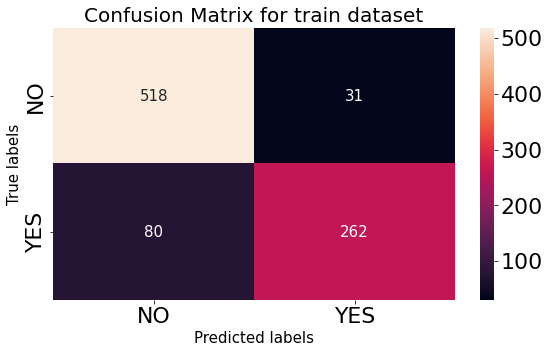

In [310]:
# Get confusion matrix for train data
get_confusion_matrix(rf_bayes_optimal,X_train,y_train,'train')

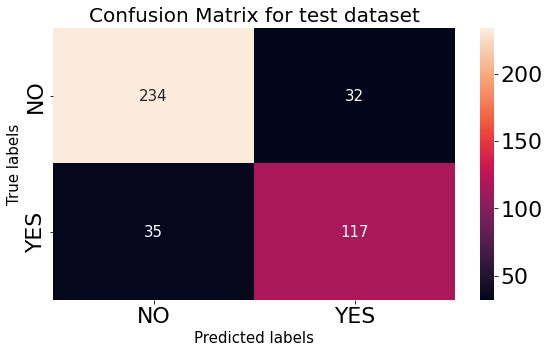

In [311]:
# Get confusion matrix for test data
get_confusion_matrix(rf_bayes_optimal,X_test,y_test,'test')

In [312]:
# Get model performance
individual_model_performance(rf_bayes_optimal, X_train, X_test, y_train, y_test)

,Metric,Performance on Train Data,Performance on Test Data
0,f_score,0.825197,0.777409
1,Accuracy,0.875421,0.839713
2,Recall,0.766082,0.769737
3,Precision,0.894198,0.785235
4,log_loss,4.302838,5.536181
5,roc_auc,0.854808,0.824718


In [313]:
# Create a function to get feature importance of random forest model
def get_feature_importance(model_name,X_train):
  importances = model_name.feature_importances_

  importance_dict = {'Feature' : df.drop('Survived',axis=1).columns,
                    'Feature Importance' : importances}

  importance_df = pd.DataFrame(importance_dict)
  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],3)
  importance_df.sort_values('Feature Importance',ascending=False,inplace =True)
  importance_df.reset_index(drop=True,inplace=True)
  return importance_df[importance_df['Feature Importance']>0]

In [314]:
rf_feature_importance = get_feature_importance(rf_bayes_optimal,X_train)
rf_feature_importance

,Feature,Feature Importance
0,Sex,0.383
1,Fare,0.134
2,Age,0.093
3,Pclass,0.093
4,PassengerId,0.081
5,Cabin_num,0.058
6,Cabin_class_np,0.049
7,SibSp,0.032
8,Parch,0.026
9,Embarked_S,0.014


### Model Interpretation (usign SHAP)

#### Summary Plot - Impact of features on predictions at global level

In [315]:
def get_summary_plot(model_name,X_test):
  # DF, based on which importance is checked
  X_importance = X_test

  # Explain model predictions using shap library (TreeExplainer is faster than KernalExplainer):
  explainer = shap.TreeExplainer(model_name)
  shap_values = explainer.shap_values(X_importance)

  # Plot summary_plot for Passed 
  shap.summary_plot(shap_values[1], X_importance)

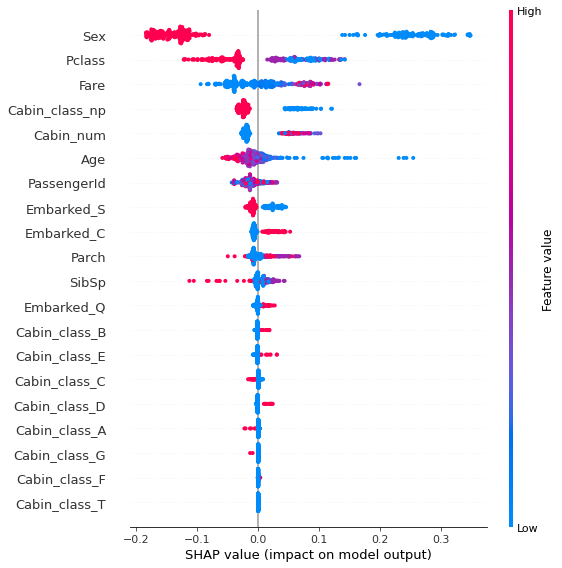

In [316]:
get_summary_plot(rf_bayes_optimal,X_test)

In [317]:
 def get_summary_bar_plot(model_name,X_test):
  # DF, based on which importance is checked
  X_importance = X_test

  # Explain model predictions using shap library (TreeExplainer is faster than KernalExplainer):
  explainer = shap.TreeExplainer(model_name)
  shap_values = explainer.shap_values(X_importance)

  # Plot summary_plot for Passed 
  shap.summary_plot(shap_values[1], X_importance, plot_type='bar') 

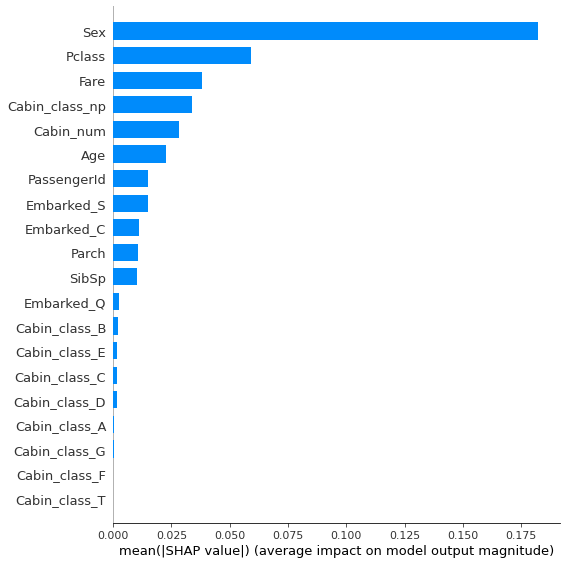

In [318]:
get_summary_bar_plot(rf_bayes_optimal,X_test)

## <b><u>XGBClassifier model

### Training a XGB Classifier

In [319]:
start = time. time()

# Create an instance of the RandomForestClassifier
xgb_model = XGBClassifier(subsample=0.9, colsample_bytree =0.4,random_state=0)

# Grid search
xgb_bayes= BayesSearchCV(estimator=xgb_model,
                       search_spaces = {'max_depth': (5,20),
                                    'min_samples_weight': (0.9,1),
                                    'reg_alpha':(0.1,10), 'gamma':(0.1,1)}, n_iter=20,
                       cv = 4, verbose=2, scoring='recall')
# Fit the data
xgb_bayes.fit(X_train,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END gamma=0.14473813835545313, max_depth=16, min_samples_weight=0.993137494475167, reg_alpha=8.22550292841001; total time=   0.1s
[CV] END gamma=0.14473813835545313, max_depth=16, min_samples_weight=0.993137494475167, reg_alpha=8.22550292841001; total time=   0.1s
[CV] END gamma=0.14473813835545313, max_depth=16, min_samples_weight=0.993137494475167, reg_alpha=8.22550292841001; total time=   0.1s
[CV] END gamma=0.14473813835545313, max_depth=16, min_samples_weight=0.993137494475167, reg_alpha=8.22550292841001; total time=   0.1s
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END gamma=0.7872471175984985, max_depth=10, min_samples_weight=0.9661482779349999, reg_alpha=9.184050157932155; total time=   0.1s
[CV] END gamma=0.7872471175984985, max_depth=10, min_samples_weight=0.9661482779349999, reg_alpha=9.184050157932155; total time=   0.1s
[CV] END gamma=0.7872471175984985, max_depth=10, min_samples_weight=0.

In [320]:
# Get best estimators from the cross validation results
xgb_bayes.best_estimator_

XGBClassifier(colsample_bytree=0.4, gamma=0.24044890901920687, max_depth=15,
              min_samples_weight=0.9085980945453755, reg_alpha=4.04985831576237,
              subsample=0.9)

In [321]:
# Create a optmial XGBoost model
xgb_bayes_optimal = xgb_bayes.best_estimator_

### Performance check

In [322]:
# Get the score on both train and test data
xgb_bayes_optimal.score(X_train,y_train),xgb_bayes_optimal.score(X_test,y_test)

(0.8709315375982043, 0.8732057416267942)

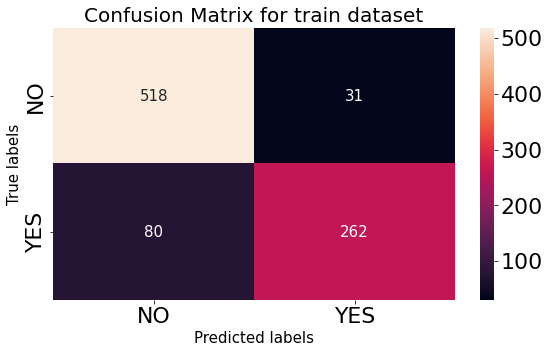

In [323]:
# Get confusion matrix for train data
get_confusion_matrix(rf_bayes_optimal,X_train,y_train,'train')

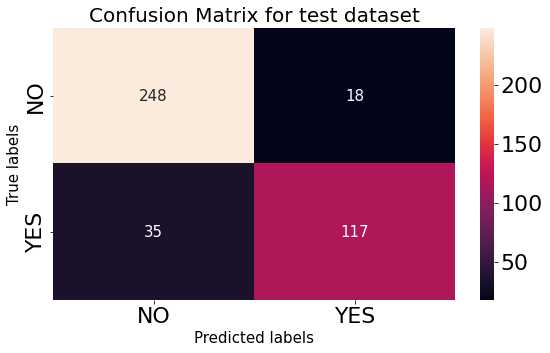

In [324]:
# Get confusion matrix for test data
get_confusion_matrix(xgb_bayes_optimal,X_test,y_test,'test')

In [325]:
# Get the model performance
individual_model_performance(xgb_bayes_optimal, X_train, X_test, y_train, y_test)

,Metric,Performance on Train Data,Performance on Test Data
0,f_score,0.821705,0.815331
1,Accuracy,0.870932,0.873206
2,Recall,0.774854,0.769737
3,Precision,0.874587,0.866667
4,log_loss,4.457901,4.379353
5,roc_auc,0.852819,0.851034


In [326]:
# Get feature importances
xgb_feature_importance = get_feature_importance(xgb_bayes_optimal,X_train)
xgb_feature_importance

,Feature,Feature Importance
0,Sex,0.517
1,Pclass,0.133
2,Cabin_class_np,0.059
3,Cabin_num,0.039
4,SibSp,0.036
5,Age,0.026
6,Parch,0.026
7,Cabin_class_E,0.025
8,Fare,0.024
9,Embarked_S,0.020


### Model Interpretation

#### Functions for shap plots


In [327]:
def get_force_plot_for1ob_BT(model_name,X_test):
  # Initialize JavaScript visualizations in notebook environment
  shap.initjs()
  # Define a tree explainer for the built model
  explainer = shap.TreeExplainer(model_name)
  # obtain shap values for the first row of the test data
  shap_values = explainer.shap_values(X_test.iloc[0])

  # explainer.expected_value[0] means mean probability for 0,  shap_values[0] means shape values for class 0 
  plot = shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[0]) 
  return plot

In [328]:
def get_force_plot_for100ob_BT(model_name,X_test):
  # Initialize JavaScript visualizations in notebook environment
  shap.initjs()
  # Define a tree explainer for the built model
  explainer = shap.TreeExplainer(model_name)
  # obtain shap values for the first row of the test data
  shap_values = explainer.shap_values(X_test.iloc[:100])

  # explainer.expected_value[0] means mean probability for 0,  shap_values[0] means 
  plot = shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[:100]) 
  return plot

In [329]:
def get_summary_plot_BT(model_name,X_test):
  # DF, based on which importance is checked
  X_importance = X_test

  # Explain model predictions using shap library (TreeExplainer is faster than KernalExplainer):
  explainer = shap.TreeExplainer(model_name)
  shap_values = explainer.shap_values(X_importance)

  # Plot summary_plot for Passed 
  shap.summary_plot(shap_values, X_importance)

In [330]:
 def get_summary_bar_plot_BT(model_name,X_test):
  # DF, based on which importance is checked
  X_importance = X_test

  # Explain model predictions using shap library (TreeExplainer is faster than KernalExplainer):
  explainer = shap.TreeExplainer(model_name)
  shap_values = explainer.shap_values(X_importance)

  # Plot summary_plot for Passed 
  shap.summary_plot(shap_values, X_importance, plot_type='bar') 

#### Summary Plot - Impact of features on predictions at global level

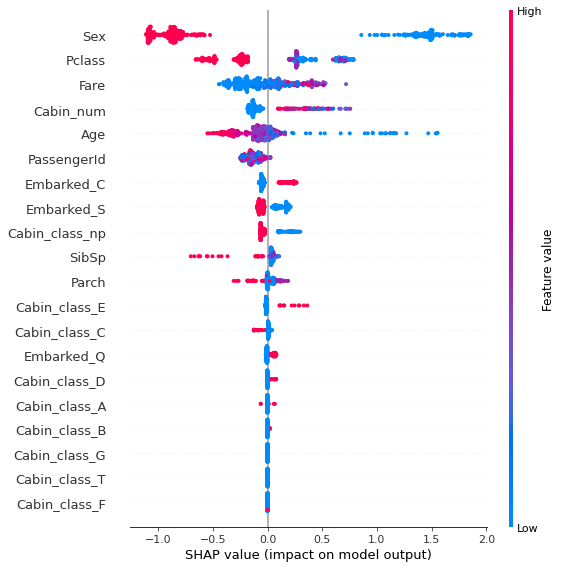

In [331]:
get_summary_plot_BT(xgb_bayes_optimal,X_test)

The noise can be described by this figure,
top 6 features shows how noisy the dataset is.

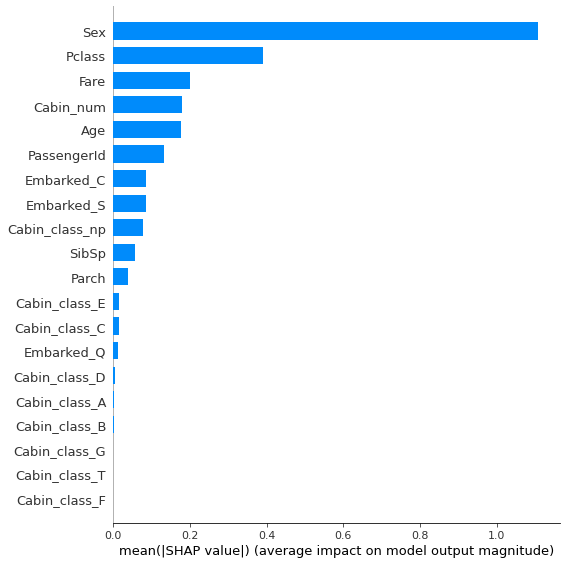

In [332]:
get_summary_bar_plot_BT(xgb_bayes_optimal,X_test)

## <b><u>Support vector machine model

###SVM model

In [333]:
# import support vector machine classifier algorithm
from sklearn.svm import SVC

In [334]:
start = time. time()

# Create an instance of the RandomForestClassifier
svm = SVC(kernel ='linear',probability=True)

# Bayes search
svm_bayes= BayesSearchCV(estimator=svm,
                       search_spaces = {'C': (0.0001,10),
                                    'gamma': (0.1,1)}, n_iter=20,
                       cv = 4, verbose=2, scoring='recall')
# Fit the train data
svm_bayes.fit(X_train,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END ......C=5.606836643400114, gamma=0.2013752991097031; total time=   0.1s
[CV] END ......C=5.606836643400114, gamma=0.2013752991097031; total time=   0.1s
[CV] END ......C=5.606836643400114, gamma=0.2013752991097031; total time=   0.1s
[CV] END ......C=5.606836643400114, gamma=0.2013752991097031; total time=   0.1s
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END ......C=7.265495642399012, gamma=0.9190219827765505; total time=   0.1s
[CV] END ......C=7.265495642399012, gamma=0.9190219827765505; total time=   0.1s
[CV] END ......C=7.265495642399012, gamma=0.9190219827765505; total time=   0.1s
[CV] END ......C=7.265495642399012, gamma=0.9190219827765505; total time=   0.1s
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END .....C=0.5405762510725713, gamma=0.8736217476279811; total time=   0.1s
[CV] END .....C=0.5405762510725713, gamma=0.8736217476279811; total time=   0.1s
[CV] END ....

In [335]:
# Get the best estimator
svm_bayes.best_estimator_

SVC(C=5.606836643400114, gamma=0.2013752991097031, kernel='linear',
    probability=True)

In [336]:
# Create a optimal svc model
svm_bayes_optimal = svm_bayes.best_estimator_

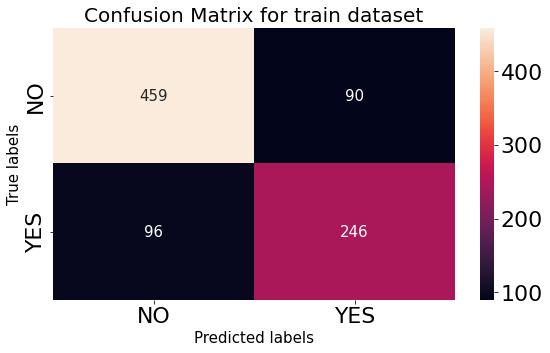

In [337]:
# Get confusion matrix for train data
get_confusion_matrix(svm_bayes_optimal,X_train,y_train,'train')

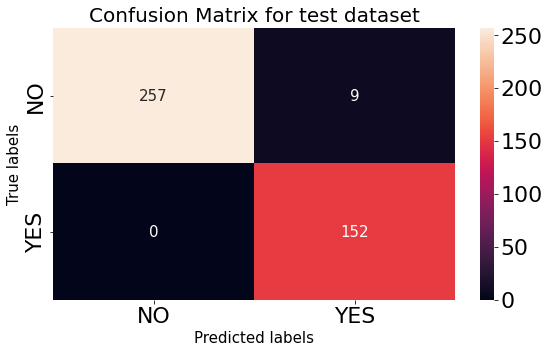

In [338]:
# Get confusion matrix for test data
get_confusion_matrix(svm_bayes_optimal,X_test,y_test,'test')

In [339]:
from sklearn.metrics import classification_report

# Print the classification report for train and test
print(classification_report(y_train, svm_bayes_optimal.predict(X_train)))
print("\n")
print(classification_report(y_test, svm_bayes_optimal.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.83      0.84      0.83       549
         1.0       0.73      0.72      0.73       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



              precision    recall  f1-score   support

           0       1.00      0.97      0.98       266
           1       0.94      1.00      0.97       152

    accuracy                           0.98       418
   macro avg       0.97      0.98      0.98       418
weighted avg       0.98      0.98      0.98       418



In [340]:
# Get feature coefficients
feature_coefficients(svm_bayes_optimal,X_train)

,Features,Coef,Absolute coef
0,Sex,-2.000541,2.000541
1,Cabin_class_F,1.556401,1.556401
2,Cabin_class_E,1.554869,1.554869
3,Cabin_class_T,-0.445283,0.445283
4,Cabin_class_C,-0.444967,0.444967
5,Cabin_class_B,-0.444394,0.444394
6,Cabin_class_np,-0.444389,0.444389
7,Cabin_class_A,-0.444262,0.444262
8,Cabin_class_D,-0.443996,0.443996
9,Cabin_class_G,-0.443979,0.443979


In [341]:
# Get the model performance
individual_model_performance(svm_bayes_optimal, X_train, X_test, y_train, y_test)

,Metric,Performance on Train Data,Performance on Test Data
0,f_score,0.725664,0.971246
1,Accuracy,0.791246,0.978469
2,Recall,0.719298,1.000000
3,Precision,0.732143,0.944099
4,log_loss,7.210196,0.743675
5,roc_auc,0.777682,0.983083


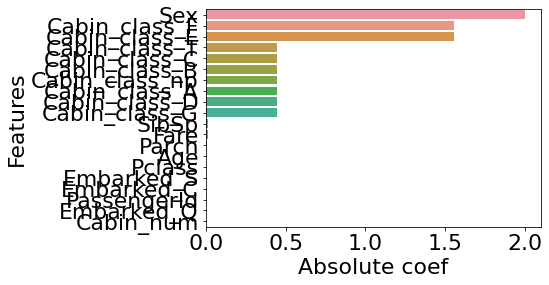

In [342]:
# Plot the feature importance plot using feature coefficients datframe
sns.barplot(x='Absolute coef',y='Features',data=feature_coefficients(svm_bayes_optimal,X_train))

### Balanced SVM model

In [343]:
# import support vector machine classifier algorithm
from sklearn.svm import SVC

In [344]:
start = time. time()

# Create an instance of the RandomForestClassifier
svm = SVC(class_weight='balanced', kernel ='linear',probability=True)

# Bayes search
svm_bayes= BayesSearchCV(estimator=svm,
                       search_spaces = {'C': (0.0001,10),
                                    'gamma': (0.1,1)}, n_iter=20,
                       cv = 4, verbose=2, scoring='recall')
# Fit the train data
svm_bayes.fit(X_train,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END ......C=2.157318004128208, gamma=0.5340343823069822; total time=   0.1s
[CV] END ......C=2.157318004128208, gamma=0.5340343823069822; total time=   0.1s
[CV] END ......C=2.157318004128208, gamma=0.5340343823069822; total time=   0.1s
[CV] END ......C=2.157318004128208, gamma=0.5340343823069822; total time=   0.1s
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END ......C=8.547657395048795, gamma=0.6380546265364133; total time=   0.1s
[CV] END ......C=8.547657395048795, gamma=0.6380546265364133; total time=   0.1s
[CV] END ......C=8.547657395048795, gamma=0.6380546265364133; total time=   0.1s
[CV] END ......C=8.547657395048795, gamma=0.6380546265364133; total time=   0.1s
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END ......C=9.392983431341056, gamma=0.7997572203982296; total time=   0.1s
[CV] END ......C=9.392983431341056, gamma=0.7997572203982296; total time=   0.1s
[CV] END ....

In [345]:
# Get the best estimator
svm_bayes.best_estimator_

SVC(C=0.9253016312100235, class_weight='balanced', gamma=0.31838132827435567,
    kernel='linear', probability=True)

In [346]:
# Create a optimal svc model
svc_bayes_optimal = svm_bayes.best_estimator_

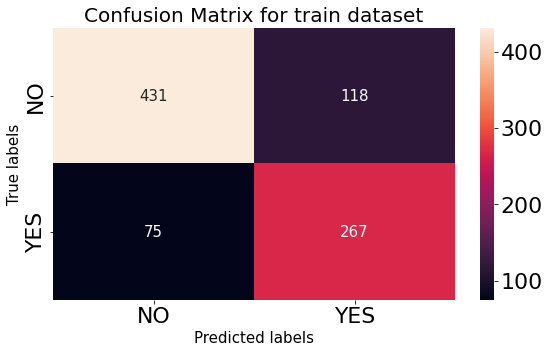

In [347]:
# Get confusion matrix for train data
get_confusion_matrix(svc_bayes_optimal,X_train,y_train,'train')

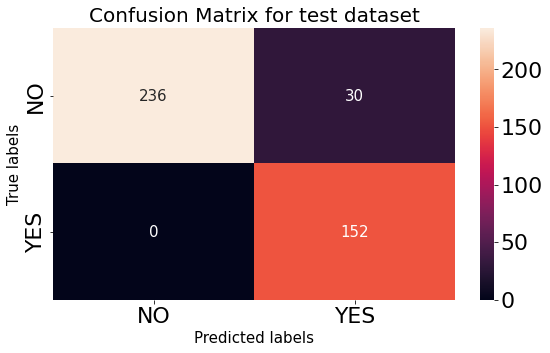

In [348]:
# Get confusion matrix for test data
get_confusion_matrix(svc_bayes_optimal,X_test,y_test,'test')

In [349]:
from sklearn.metrics import classification_report

# Print the classification report for train and test
print(classification_report(y_train, svc_bayes_optimal.predict(X_train)))
print("\n")
print(classification_report(y_test, svc_bayes_optimal.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82       549
         1.0       0.69      0.78      0.73       342

    accuracy                           0.78       891
   macro avg       0.77      0.78      0.78       891
weighted avg       0.79      0.78      0.79       891



              precision    recall  f1-score   support

           0       1.00      0.89      0.94       266
           1       0.84      1.00      0.91       152

    accuracy                           0.93       418
   macro avg       0.92      0.94      0.93       418
weighted avg       0.94      0.93      0.93       418



In [350]:
# Get feature coefficients
feature_coefficients(svc_bayes_optimal,X_train)

,Features,Coef,Absolute coef
0,Sex,-2.000112,2.000112
1,Cabin_class_np,-1.125592,1.125592
2,Cabin_class_G,-1.125535,1.125535
3,Cabin_class_C,-1.125522,1.125522
4,Cabin_class_E,0.874316,0.874316
5,Cabin_class_F,0.874111,0.874111
6,Cabin_class_D,0.873869,0.873869
7,Cabin_class_A,0.872910,0.872910
8,Cabin_class_T,-0.750860,0.750860
9,Cabin_class_B,0.632303,0.632303


In [351]:
# Get the model performance
individual_model_performance(svc_bayes_optimal, X_train, X_test, y_train, y_test)

,Metric,Performance on Train Data,Performance on Test Data
0,f_score,0.734525,0.910180
1,Accuracy,0.783389,0.928230
2,Recall,0.780702,1.000000
3,Precision,0.693506,0.835165
4,log_loss,7.481569,2.478917
5,roc_auc,0.782883,0.943609


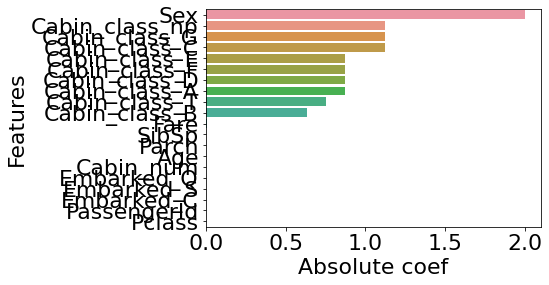

In [352]:
# Plot the feature importance plot using feature coefficients datframe
sns.barplot(x='Absolute coef',y='Features',data=feature_coefficients(svc_bayes_optimal,X_train))

# <b><u>Model Comparison based on performance

##function format : models_comparison(model_list,model_name_list,X_train,X_test,y_train,y_test)

In [353]:
# Get the accuracy score for the model
def models_comparison(model_list,model_name_list,X_train,X_test,y_train,y_test):
  # Will need these libraries
  from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix
  # Initialize the variables
  roc_auc , accuracy , precision , recall ,logloss , fscore = [],[],[],[],[],[]
  for model_name in model_list:
    # Get the predicted classes
    train_class_preds = model_name.predict(X_train)
    test_class_preds = model_name.predict(X_test)

    # Get train and test scores for that performance metric
    fscore.append((round(f1_score(y_train,train_class_preds),3) ,round(f1_score(y_test, test_class_preds),3)))
    accuracy.append((round(accuracy_score(y_train,train_class_preds),3),round(accuracy_score(y_test, test_class_preds),3)))
    recall.append((round(recall_score(y_train,train_class_preds),3), round(recall_score(y_test, test_class_preds),3)))
    precision.append((round(precision_score(y_train,train_class_preds),3), round(precision_score(y_test, test_class_preds),3)))
    logloss.append((round(log_loss(y_train,train_class_preds),3),round(log_loss(y_test, test_class_preds),3)))
    roc_auc.append((round(roc_auc_score(y_train,train_class_preds),3), round(roc_auc_score(y_test, test_class_preds),3)))

  # Prepare a metric dataframe
  model_comparison = pd.DataFrame(list(zip(model_name_list,roc_auc,accuracy,precision,recall,logloss,fscore)), columns = ['Model_Name','roc_auc_score','Accuracy_score','Precision_score','Recall_score','log_loss','f_score'])
  return model_comparison 

## Get model comparison

In [354]:
# fill the model list
model_list = [clf,lasso_bayes_optimal,rf_bayes_optimal, xgb_bayes_optimal,svm_bayes_optimal,svm_bayes_optimal]

# fill the model name list
model_name_list = ['Logistic regression model','Logistic Lasso model','Random forest model', 'XG boosted tress model', 'SVM model','Balance SVM model']

In [355]:
# Get the performance of all the model in tabular format
models_comparison(model_list, model_name_list, X_train, X_test, y_train, y_test)

,Model_Name,roc_auc_score,Accuracy_score,Precision_score,Recall_score,log_loss,f_score
0,Logistic regression model,"(0.795, 0.945)","(0.808, 0.943)","(0.757, 0.895)","(0.737, 0.954)","(6.629, 1.983)","(0.747, 0.924)"
1,Logistic Lasso model,"(0.798, 0.929)","(0.813, 0.926)","(0.768, 0.867)","(0.734, 0.941)","(6.474, 2.562)","(0.75, 0.902)"
2,Random forest model,"(0.855, 0.825)","(0.875, 0.84)","(0.894, 0.785)","(0.766, 0.77)","(4.303, 5.536)","(0.825, 0.777)"
3,XG boosted tress model,"(0.853, 0.851)","(0.871, 0.873)","(0.875, 0.867)","(0.775, 0.77)","(4.458, 4.379)","(0.822, 0.815)"
4,SVM model,"(0.778, 0.983)","(0.791, 0.978)","(0.732, 0.944)","(0.719, 1.0)","(7.21, 0.744)","(0.726, 0.971)"
5,Balance SVM model,"(0.778, 0.983)","(0.791, 0.978)","(0.732, 0.944)","(0.719, 1.0)","(7.21, 0.744)","(0.726, 0.971)"


In [356]:
from sklearn.metrics import plot_confusion_matrix

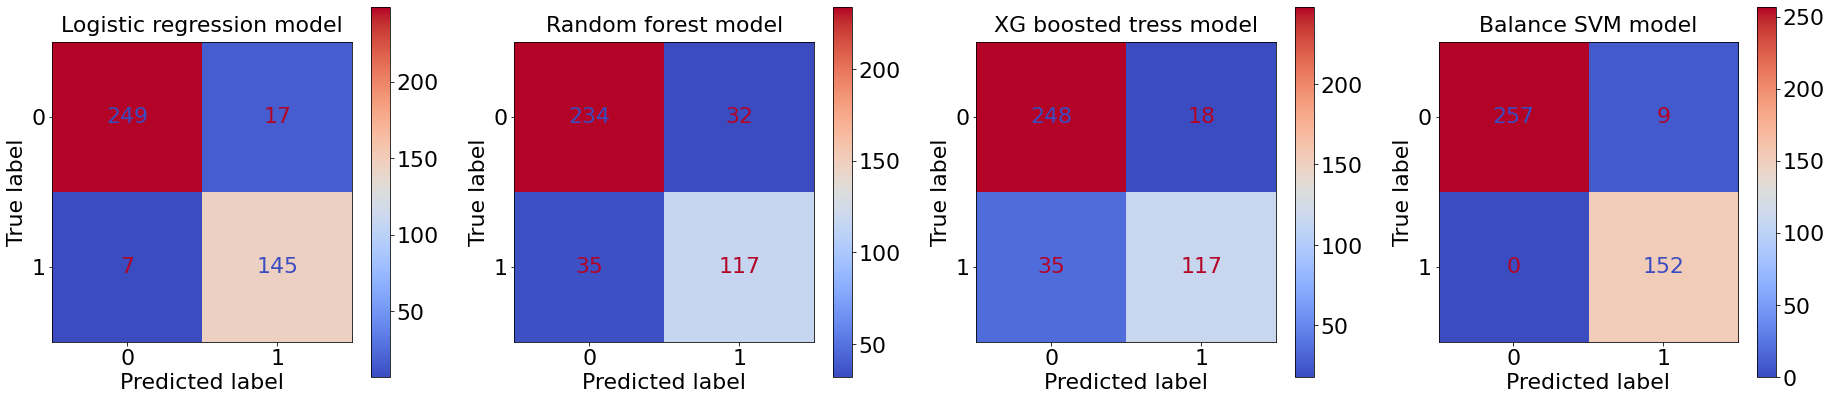

In [357]:
# Compare the models' performance on test dataset
fig, axes = plt.subplots(1,4, figsize=(26,6))
plt.rcParams.update({'font.size': 22})

classifiers = [clf,rf_bayes_optimal, xgb_bayes_optimal,svm_bayes_optimal]
model_names = ['Logistic regression model','Random forest model', 'XG boosted tress model','Balance SVM model']
for cls, ax, title in zip(classifiers, axes.flatten(),model_names):
    plot_confusion_matrix(cls, X_test, y_test, cmap=plt.cm.coolwarm, ax=ax)
    ax.grid(False)
    ax.set_title(title, size=22, pad=10)

plt.tight_layout()
plt.show()

# Submission (Perdiction on test dataset)

In [372]:
xgb_bayes_optimal.predict(X_test)

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [373]:
test_ids = test_df['PassengerId']
test_ids.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [374]:
test_predictions = xgb_bayes_optimal.predict(X_test)
submission = pd.DataFrame({'PassengerId': test_ids.values, 'Survived': test_predictions})
submission['Survived'] = submission['Survived'].astype('int8') # This is very important, float 0.0 is not same as 0. Due to this, I was getting 0.000 score on Kaggle
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [375]:
submission.shape

(418, 2)

In [376]:
submission.to_csv('submission.csv', index=False)

In [377]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>